# **Bank Customer Churn Analysis**

Data Source: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers (License - CC0: Public Domain)

Run on Python 3.12.0 | No errors | No warnings

In [1]:
# -----------------------
# Step 0: Import packages
# ----------------------- 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying and modifying the working directory
import os as os

In [2]:
# -----------------------------------------------
# Step 1: Load dataset into dataframe and verify
# -----------------------------------------------

# Tell python where to find the dataset and load it to dataframe df0
os.chdir(r'D:\OneDrive\Documents\Excel') # absolute path, using \ and r prefix
df0 = pd.read_csv("Customer-Churn-Records.csv")

# Display the first 5 rows of the dataframe
df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActive,EstimatedSalary,Exited,Complain,Status,SatisfactionScore,CardType,PointsEarned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,Is Leaving,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,Active,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,Left,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,Inactive,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,Active,5,GOLD,425


In [3]:
# ------------------------------------------------------------
# Step 2: Initial Exploratory Data Analysis (EDA) and Cleaning
# ------------------------------------------------------------

# Display basic information about the data 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Country            10000 non-null  object 
 5   Gender             10000 non-null  object 
 6   Age                10000 non-null  int64  
 7   Tenure             10000 non-null  int64  
 8   Balance            10000 non-null  float64
 9   NumOfProducts      10000 non-null  int64  
 10  HasCrCard          10000 non-null  int64  
 11  IsActive           10000 non-null  int64  
 12  EstimatedSalary    10000 non-null  float64
 13  Exited             10000 non-null  int64  
 14  Complain           10000 non-null  int64  
 15  Status             10000 non-null  object 
 16  SatisfactionScore  1000

In [4]:
# Display descriptive statistics about the data 
df0.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActive,EstimatedSalary,Exited,Complain,SatisfactionScore,PointsEarned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
# Check for missing values
df0.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Country              0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActive             0
EstimatedSalary      0
Exited               0
Complain             0
Status               0
SatisfactionScore    0
CardType             0
PointsEarned         0
dtype: int64

In [6]:
# Check for duplicates
df0.duplicated().sum()

0

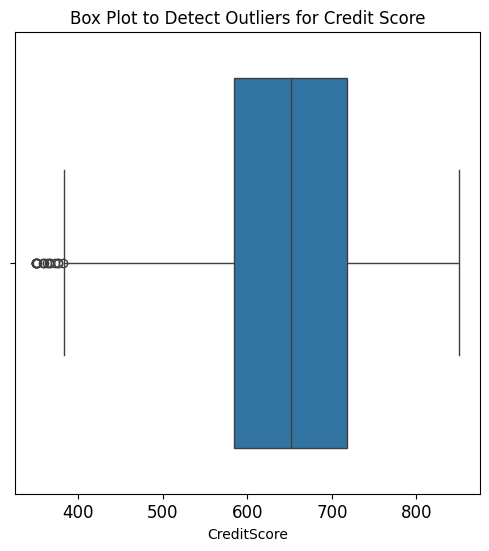

In [7]:
# Create a boxplot of the distribution of `CreditScore` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Box Plot to Detect Outliers for Credit Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['CreditScore'])
plt.show()

There are a few outliers for credit score.

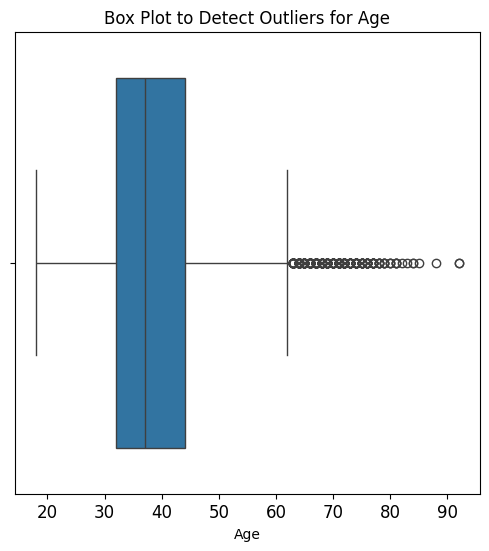

In [8]:
# Create a boxplot of the distribution of `Age` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Box Plot to Detect Outliers for Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Age'])
plt.show()

There are outliers for age.

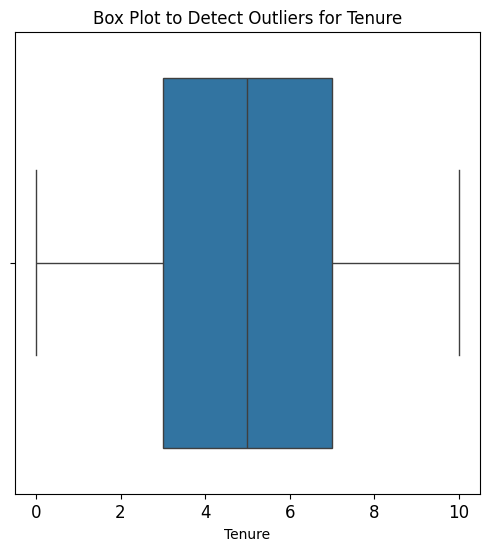

In [9]:
# Create a boxplot of the distribution of `Tenure` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Box Plot to Detect Outliers for Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Tenure'])
plt.show()

There are no outliers for tenure.

In [10]:
# Determine outlier values for CreditScore

# Calculate the 25th percentile
percentile25 = df0['CreditScore'].quantile(0.25)
print("25th percentile:", percentile25)

# Calculate the 75th percentile
percentile75 = df0['CreditScore'].quantile(0.75)
print("75th percentile:", percentile75)

# Calculate the interquartile range
iqr = percentile75 - percentile25
print("IQR:", iqr)

# Define the upper limit and lower limit for non-outlier values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outlier values for `CreditScore`
outliers = df0[(df0['CreditScore'] > upper_limit) | (df0['CreditScore'] < lower_limit)]

# Count the number of rows with outliers
print("Number of rows with outliers for `CreditScore`:", len(outliers))

25th percentile: 584.0
75th percentile: 718.0
IQR: 134.0
Lower limit: 383.0
Upper limit: 919.0
Number of rows with outliers for `CreditScore`: 15


In [11]:
# Determine outlier values for Age

# Calculate the 25th percentile
percentile25 = df0['Age'].quantile(0.25)
print("25th percentile:", percentile25)

# Calculate the 75th percentile
percentile75 = df0['Age'].quantile(0.75)
print("75th percentile:", percentile75)

# Calculate the interquartile range
iqr = percentile75 - percentile25
print("IQR:", iqr)

# Define the upper limit and lower limit for non-outlier values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outlier values for `Age`
outliers = df0[(df0['Age'] > upper_limit) | (df0['Age'] < lower_limit)]

# Count the number of rows with outliers
print("Number of rows with outliers for `Age`:", len(outliers))

25th percentile: 32.0
75th percentile: 44.0
IQR: 12.0
Lower limit: 14.0
Upper limit: 62.0
Number of rows with outliers for `Age`: 359


We won't remove the outliers for this analysis. We need to see all of the data.

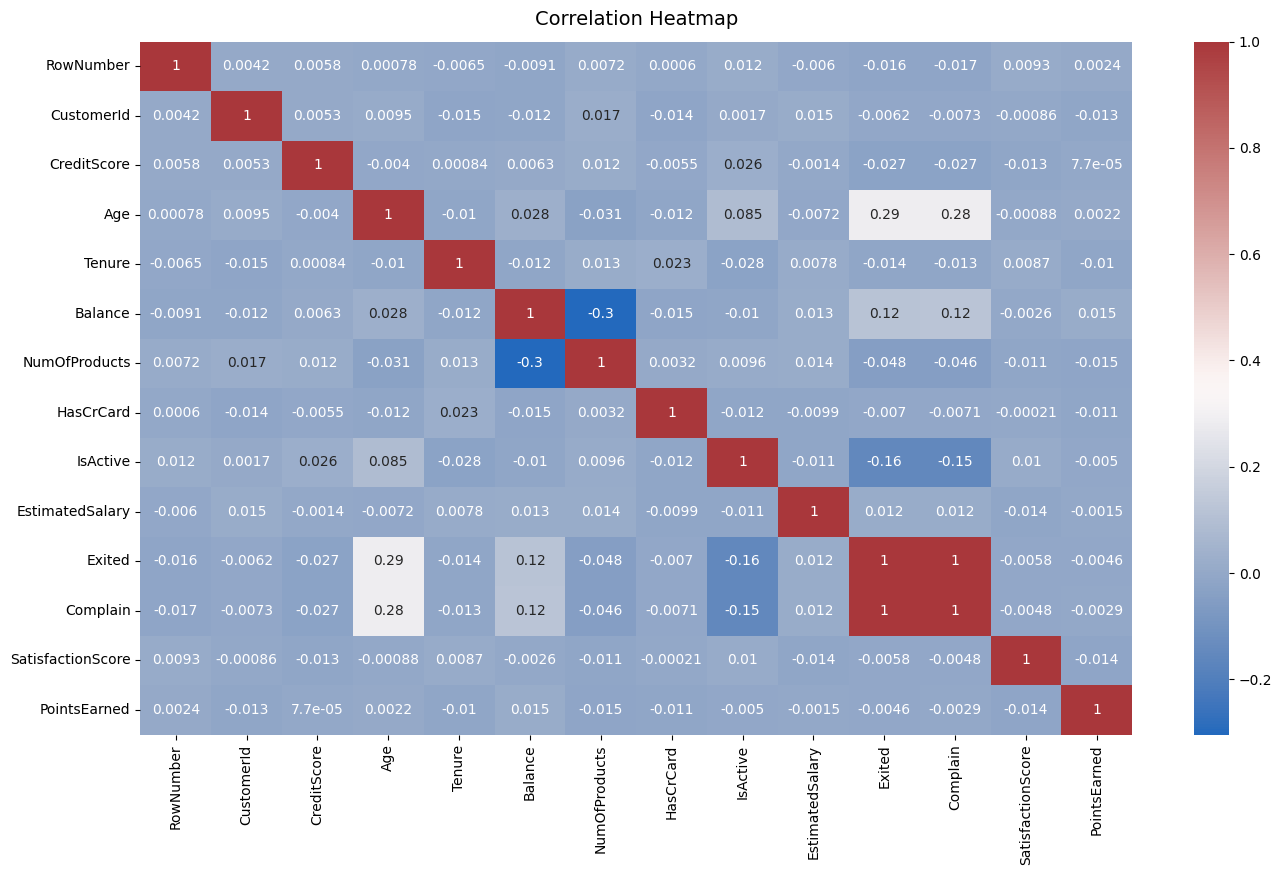

In [12]:
# Display a heatmap of numeric variable correlation
corr = df0.corr(numeric_only = 1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr, vmin=None, vmax=None, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Complained and exited are well-correlated and linear. If a customer complained, they left.

In [13]:
# Save df0 to csv
df0.to_csv('Customer-Churn-Records-Final.csv', index=False, encoding='utf-8')

Save cleaned dataset to a csv file for further analysis and visualization in Tableau.